In [8]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pickle
from sklearn.kernel_ridge import KernelRidge

In [27]:
t = np.linspace(0, 2*np.pi, 100)
y = np.sin(t)
y_noisy = y + (np.random.rand(t.shape[0]) - 0.5)

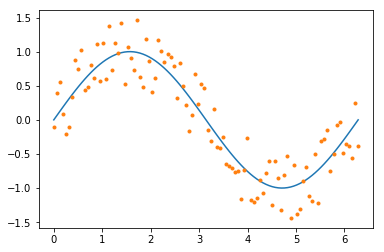

In [28]:
plt.plot(t, y, '-')
plt.plot(t, y_noisy, '.')
plt.show()

In [41]:
with open('data/data.pickle', 'w') as fout:
    pickle.dump(obj=(t, y, y_noisy), file=fout)

In [10]:
kr1 = KernelRidge(kernel='linear')
kr2 = KernelRidge(kernel='rbf')

In [31]:
kr1.fit(np.expand_dims(t,1), np.expand_dims(y_noisy,1))
y1 = kr1.predict(np.expand_dims(t,1)).flatten()
kr2.fit(np.expand_dims(t,1), np.expand_dims(y_noisy,1))
y2 = kr2.predict(np.expand_dims(t,1)).flatten()

In [37]:
plt.figure()
plt.plot(t, y, '-', label='true')
plt.plot(t, y_noisy, '.', label='noisy')
plt.plot(t, y1, '.', label='linear')
plt.plot(t, y2, '.', label='rbf')
plt.title('Regression')
plt.legend()
plt.savefig('latex/figs/plot.png')